In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Data shape after outlier removal: (239825, 40)
Gradient for linear.weight: 958.0859375
Gradient for linear.bias: 426.90362548828125
Gradient for linear.weight: 958.02978515625
Gradient for linear.bias: 426.8785400390625
Gradient for linear.weight: 957.9736328125
Gradient for linear.bias: 426.85345458984375
Gradient for linear.weight: 957.91748046875
Gradient for linear.bias: 426.82843017578125
Gradient for linear.weight: 957.861328125
Gradient for linear.bias: 426.8033447265625
Gradient for linear.weight: 957.80517578125
Gradient for linear.bias: 426.7783203125
Gradient for linear.weight: 957.7489013671875
Gradient for linear.bias: 426.75323486328125
Gradient for linear.weight: 957.6929931640625
Gradient for linear.bias: 426.7281799316406
Gradient for linear.weight: 957.63671875
Gradient for linear.bias: 426.7031555175781
Gradient for linear.weight: 957.58056640625
Gradient for linear.bias: 426.67803955078125
Gradient for linear.weight: 957.5243530273438
Gradient for linear.bias: 426.6

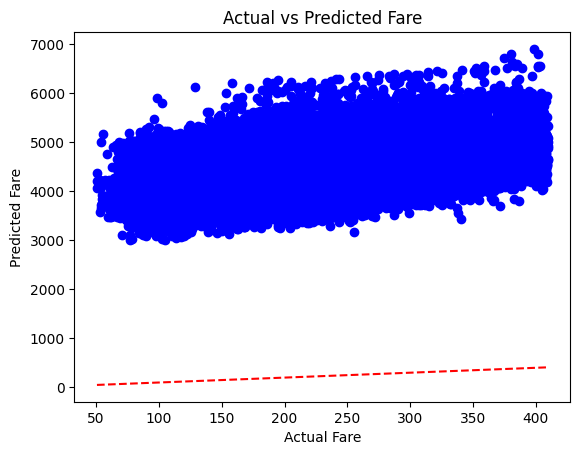

In [117]:


# Load the data from the pickle file
data = pd.read_pickle('final_features.pkl')

# Remove rows with NaN values in relevant fields
data = data[['Year', 'citymarketid_1', 'citymarketid_2', 'nsmiles',
    'passengers', 'large_ms', 'fare', 'fare_lg', 'lf_ms', 'fare_low',
    'city1_lati', 'city1_long', 'city2_lati', 'city2_long',
    'airportid_1_encoded', 'airportid_2_encoded', 'fare_passenger_interaction',
    'city_distance', 'fare_diff_lg_low', 'fare_low_lf_ms_interaction',
    'citymarketid_1_encoded', 'citymarketid_2_encoded', 'large_ms_std',
    'lf_ms_std', 'passengers_per_mile', 'passenger_market_demand',
    'miles/passenger', 'city1_popularity', 'city2_popularity',
    'nmiles/popularity1', 'city1_region_Midwest', 'city1_region_Northeast',
    'city1_region_Other', 'city1_region_South', 'city1_region_West',
    'city2_region_Midwest', 'city2_region_Northeast', 'city2_region_Other',
    'city2_region_South', 'city2_region_West']].dropna()



# Remove outliers using IQR (Interquartile Range)
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data = data[(data['fare'] >= lower_bound) & (data['fare'] <= upper_bound)]

# Ensure data types are correct
data['Year'] = data['Year'].astype(float)
data['passengers'] = data['passengers'].astype(float)
data['fare'] = data['fare'].astype(float)

# Normalize the features
scaler = MinMaxScaler()
data[['Year', 'citymarketid_1', 'citymarketid_2', 'nsmiles',
    'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low',
    'city1_lati', 'city1_long', 'city2_lati', 'city2_long',
    'airportid_1_encoded', 'airportid_2_encoded', 'fare_passenger_interaction',
    'city_distance', 'fare_diff_lg_low', 'fare_low_lf_ms_interaction',
    'citymarketid_1_encoded', 'citymarketid_2_encoded', 'large_ms_std',
    'lf_ms_std', 'passengers_per_mile', 'passenger_market_demand',
    'miles/passenger', 'city1_popularity', 'city2_popularity',
    'nmiles/popularity1', 'city1_region_Midwest', 'city1_region_Northeast',
    'city1_region_Other', 'city1_region_South', 'city1_region_West',
    'city2_region_Midwest', 'city2_region_Northeast', 'city2_region_Other',
    'city2_region_South', 'city2_region_West']] = scaler.fit_transform(data[['Year', 'citymarketid_1', 'citymarketid_2', 'nsmiles',
    'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low',
    'city1_lati', 'city1_long', 'city2_lati', 'city2_long',
    'airportid_1_encoded', 'airportid_2_encoded', 'fare_passenger_interaction',
    'city_distance', 'fare_diff_lg_low', 'fare_low_lf_ms_interaction',
    'citymarketid_1_encoded', 'citymarketid_2_encoded', 'large_ms_std',
    'lf_ms_std', 'passengers_per_mile', 'passenger_market_demand',
    'miles/passenger', 'city1_popularity', 'city2_popularity',
    'nmiles/popularity1', 'city1_region_Midwest', 'city1_region_Northeast',
    'city1_region_Other', 'city1_region_South', 'city1_region_West',
    'city2_region_Midwest', 'city2_region_Northeast', 'city2_region_Other',
    'city2_region_South', 'city2_region_West']])

# Check the shape of the data after outlier removal
print(f"Data shape after outlier removal: {data.shape}")

# Select relevant features and target
features = data[['Year', 'citymarketid_1', 'citymarketid_2', 'nsmiles',
    'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low',
    'city1_lati', 'city1_long', 'city2_lati', 'city2_long',
    'airportid_1_encoded', 'airportid_2_encoded', 'fare_passenger_interaction',
    'city_distance', 'fare_diff_lg_low', 'fare_low_lf_ms_interaction',
    'citymarketid_1_encoded', 'citymarketid_2_encoded', 'large_ms_std',
    'lf_ms_std', 'passengers_per_mile', 'passenger_market_demand',
    'miles/passenger', 'city1_popularity', 'city2_popularity',
    'nmiles/popularity1', 'city1_region_Midwest', 'city1_region_Northeast',
    'city1_region_Other', 'city1_region_South', 'city1_region_West',
    'city2_region_Midwest', 'city2_region_Northeast', 'city2_region_Other',
    'city2_region_South', 'city2_region_West']]
target = data['fare']

# Normalize the target variable 'fare' (Optional, only if needed)
# If the target values are too large compared to the normalized features, normalize 'fare' as well.
# Remove these lines if it's not necessary.
scaler_fare = MinMaxScaler()
data['fare'] = scaler_fare.fit_transform(data[['fare']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer with input_dim features

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, define loss function and optimizer
input_dim = features.shape[1]  # Get the number of input features dynamically
model = LinearRegressionModel(input_dim)  # Pass the input dimension to the model

# Change optimizer to Adam with a higher learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loss function remains the same
criterion = nn.MSELoss()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear gradients
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()

    # Optional: Log gradients to check for vanishing/exploding gradients
    for name, param in model.named_parameters():
        if param.grad is not None:
            print(f'Gradient for {name}: {param.grad.norm().item()}')
    
    # Update weights
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
        
# Get model parameters
with torch.no_grad():
    w = model.linear.weight[0].numpy()  # Get weights
    b = model.linear.bias.item()          # Get bias

# Print the equation of the model
print("Regression Model Equation:")
equation = "Fare = {:.4f}".format(b) 
for i, weight in enumerate(w):
    equation += " + ({:.4f} * {})".format(weight, feature_names[i])

print(equation)

# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# Rescale predictions back to original scale (if fare was normalized)
y_pred = scaler_fare.inverse_transform(y_pred)

# Scatter plot of actual vs predicted fare
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Line y=x for perfect prediction
plt.show()


Epoch [100/1000], Loss: 0.0071
Epoch [200/1000], Loss: 0.0019
Epoch [300/1000], Loss: 0.0016
Epoch [400/1000], Loss: 0.0015
Epoch [500/1000], Loss: 0.0014
Epoch [600/1000], Loss: 0.0014
Epoch [700/1000], Loss: 0.0013
Epoch [800/1000], Loss: 0.0013
Epoch [900/1000], Loss: 0.0012
Epoch [1000/1000], Loss: 0.0012


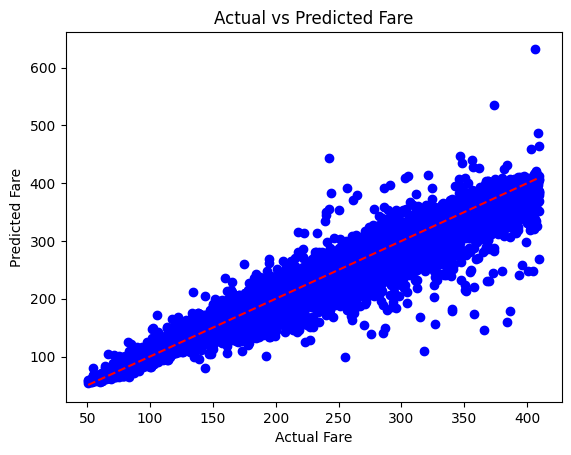

In [118]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_pickle('final_features.pkl')

# Data Preprocessing: Handle missing values, normalize, remove outliers
data = data[['Year', 'citymarketid_1', 'citymarketid_2', 'nsmiles',
    'passengers', 'large_ms', 'fare', 'fare_lg', 'lf_ms', 'fare_low',
    'city1_lati', 'city1_long', 'city2_lati', 'city2_long',
    'airportid_1_encoded', 'airportid_2_encoded', 'fare_passenger_interaction',
    'city_distance', 'fare_diff_lg_low', 'fare_low_lf_ms_interaction',
    'citymarketid_1_encoded', 'citymarketid_2_encoded', 'large_ms_std',
    'lf_ms_std', 'passengers_per_mile', 'passenger_market_demand',
    'miles/passenger', 'city1_popularity', 'city2_popularity',
    'nmiles/popularity1', 'city1_region_Midwest', 'city1_region_Northeast',
    'city1_region_Other', 'city1_region_South', 'city1_region_West',
    'city2_region_Midwest', 'city2_region_Northeast', 'city2_region_Other',
    'city2_region_South', 'city2_region_West']].dropna()

# Remove outliers using IQR
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['fare'] >= lower_bound) & (data['fare'] <= upper_bound)]

# Ensure data types
data['Year'] = data['Year'].astype(float)
data['passengers'] = data['passengers'].astype(float)
data['fare'] = data['fare'].astype(float)

# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['fare']))
target = data['fare'].values.reshape(-1, 1)

# Normalize the target (optional)
scaler_fare = MinMaxScaler()
scaled_target = scaler_fare.fit_transform(target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Neural Network Definition
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetworkModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)         # Second hidden layer
        self.fc3 = nn.Linear(64, 32)          # Third hidden layer
        self.fc4 = nn.Linear(32, 1)           # Output layer
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Instantiate the model
input_dim = X_train.shape[1]  # Number of features
model = NeuralNetworkModel(input_dim)

# Loss function and optimizer
criterion = nn.MSELoss()  # Using MSE Loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 4000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train_tensor = model(X_train_tensor)
    y_pred_test_tensor = model(X_test_tensor)

    # Rescale the predictions back to the original scale (if 'fare' was normalized)
    y_pred_train = scaler_fare.inverse_transform(y_pred_train_tensor.numpy())
    y_pred_test = scaler_fare.inverse_transform(y_pred_test_tensor.numpy())
    y_test_rescaled = scaler_fare.inverse_transform(y_test_tensor.numpy())

# Plot Actual vs Predicted (on the test set)
plt.scatter(y_test_rescaled, y_pred_test, color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], '--r')  # Line y=x for perfect prediction
plt.show()

torch.save(model.state_dict(), 'trained_neural_network_model.pth')

# Display Regression Formula (Weights and Biases)
def display_regression_formula(model, feature_names):
    print("Neural Network Regression Equation:")
    with torch.no_grad():
        weights = model.fc4.weight[0].numpy()  # Get final layer weights
        bias = model.fc4.bias.item()           # Get final layer bias
        
        equation = "Fare = {:.4f}".format(bias)
        for i, weight in enumerate(weights):
            equation += " + ({:.4f} * {})".format(weight, feature_names[i])
        print(equation)

feature_names = data.drop(columns=['fare']).columns
display_regression_formula(model, feature_names)

# Calculate R² Score
r2_test = r2_score(y_test_rescaled, y_pred_test)
r2_train = r2_score(target, y_pred_train)

print(f'R² score on training data: {r2_train:.4f}')
print(f'R² score on test data: {r2_test:.4f}')

# Calculate Standard Deviation of Residuals (Test)
residuals_test = y_test_rescaled - y_pred_test
std_dev_residuals = np.std(residuals_test)

print(f'Standard Deviation of Residuals (Test): {std_dev_residuals:.4f}')

# Plot Actual vs Predicted (on the test set)
plt.scatter(y_test_rescaled, y_pred_test, color='blue')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], '--r')  # Line y=x for perfect prediction
plt.show()

